### Building classification models for default of creadit card problem
- Logistic Regression
- SVC
- Decision Tree
- Random Forest Tree
- XGB
- LGBM
- CatBoost
<p>Logistic Regression data will be woe transformed, but some preprocessing steps are same with SVC.</p>
<p>Decision Tree, Random Forest Tree, XGB, LGBM, CatBoost will be the same.</p>

# Importing the Libraries

In [307]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read the Data

In [308]:
default_credit_card_clients_data = pd.read_excel(r'C:\Users\Shahbaz\Desktop\socool\exam\classification\default of credit card clients.xls')
data = default_credit_card_clients_data.copy()

In [309]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


- target is <code>default</code> column

In [310]:
data.shape

(30000, 25)

In [311]:
data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.0000,30000.0000,30000,30000,30000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000,30000.0000
unique,NaN,NaN,2,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.5000,167484.3227,NaN,NaN,NaN,35.4855,-0.0167,-0.1338,-0.1662,-0.2207,-0.2662,-0.2911,51223.3309,49179.0752,47013.1548,43262.9490,40311.4010,38871.7604,5663.5805,5921.1635,5225.6815,4826.0769,4799.3876,5215.5026,0.2212
std,8660.3984,129747.6616,NaN,NaN,NaN,9.2179,1.1238,1.1972,1.1969,1.1691,1.1332,1.1500,73635.8606,71173.7688,69349.3874,64332.8561,60797.1558,59554.1075,16563.2804,23040.8704,17606.9615,15666.1597,15278.3057,17777.4658,0.4151
min,1.0000,10000.0000,NaN,NaN,NaN,21.0000,-2.0000,-2.0000,-2.0000,-2.0000,-2.0000,-2.0000,-165580.0000,-69777.0000,-157264.0000,-170000.0000,-81334.0000,-339603.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,7500.7500,50000.0000,NaN,NaN,NaN,28.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,-1.0000,3558.7500,2984.7500,2666.2500,2326.7500,1763.0000,1256.0000,1000.0000,833.0000,390.0000,296.0000,252.5000,117.7500,0.0000
50%,15000.5000,140000.0000,NaN,NaN,NaN,34.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,22381.5000,21200.0000,20088.5000,19052.0000,18104.5000,17071.0000,2100.0000,2009.0000,1800.0000,1500.0000,1500.0000,1500.0000,0.0000
75%,22500.2500,240000.0000,NaN,NaN,NaN,41.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,67091.0000,64006.2500,60164.7500,54506.0000,50190.5000,49198.2500,5006.0000,5000.0000,4505.0000,4013.2500,4031.5000,4000.0000,0.0000


In [312]:
data.drop('ID', axis=1, inplace=True) # drop meaningless column

In [313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   LIMIT_BAL  30000 non-null  int64 
 1   SEX        30000 non-null  object
 2   EDUCATION  30000 non-null  object
 3   MARRIAGE   30000 non-null  object
 4   AGE        30000 non-null  int64 
 5   PAY_0      30000 non-null  int64 
 6   PAY_2      30000 non-null  int64 
 7   PAY_3      30000 non-null  int64 
 8   PAY_4      30000 non-null  int64 
 9   PAY_5      30000 non-null  int64 
 10  PAY_6      30000 non-null  int64 
 11  BILL_AMT1  30000 non-null  int64 
 12  BILL_AMT2  30000 non-null  int64 
 13  BILL_AMT3  30000 non-null  int64 
 14  BILL_AMT4  30000 non-null  int64 
 15  BILL_AMT5  30000 non-null  int64 
 16  BILL_AMT6  30000 non-null  int64 
 17  PAY_AMT1   30000 non-null  int64 
 18  PAY_AMT2   30000 non-null  int64 
 19  PAY_AMT3   30000 non-null  int64 
 20  PAY_AMT4   30000 non-null  i

we have just 3 object as categoric values

In [314]:
data.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

- our data is imbalanced that's why we need gini score for comparing
- and most of the columns should be converted to categoric for Logistic Regression

In [315]:
def frequency_dist(data):
    for x in data.columns:
        if data[x].dtype != object:
            plt.figure(figsize=(8, 6))
            plt.hist(data[x], bins=30, color='skyblue', edgecolor='black')
            plt.xlabel(x)
            plt.ylabel('Frequency')
            plt.title('Distribution of ' + x)
            plt.show()


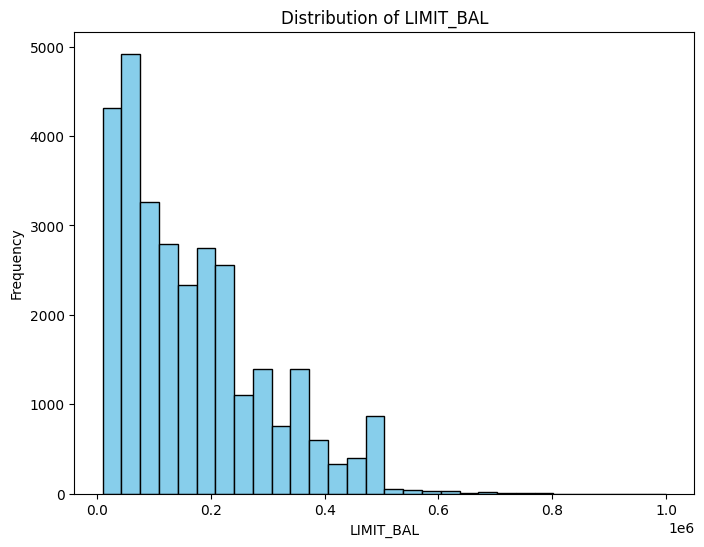

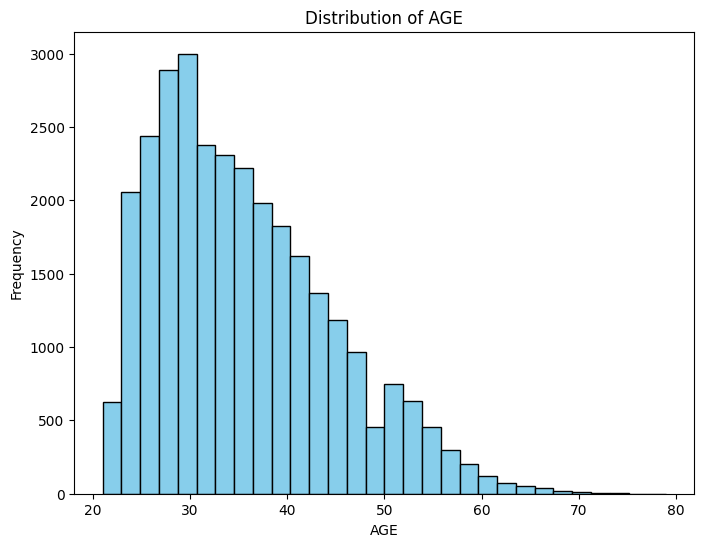

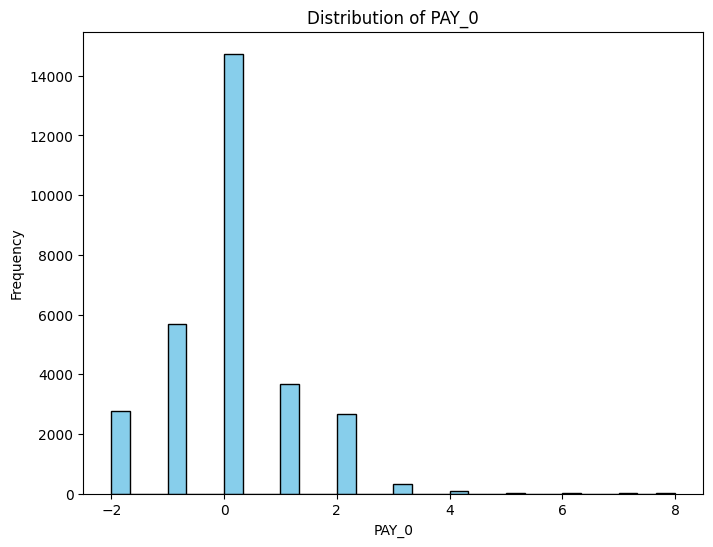

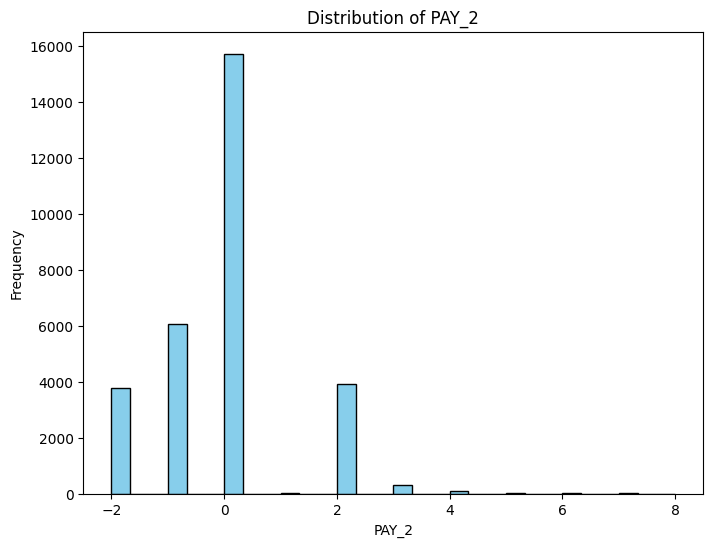

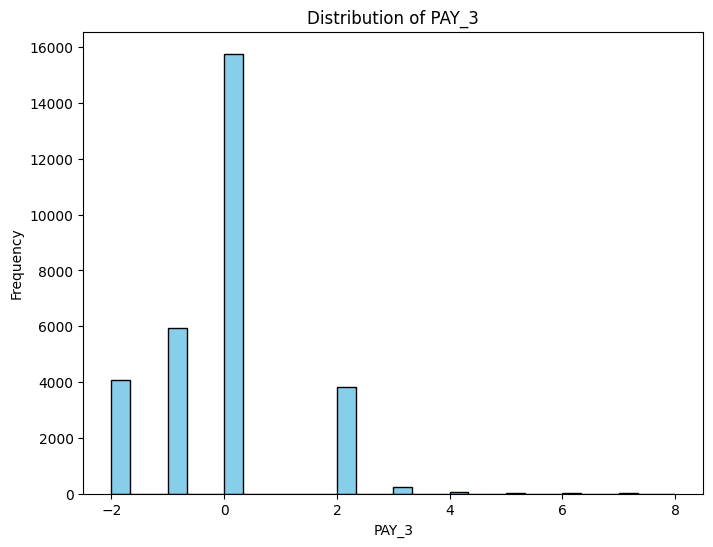

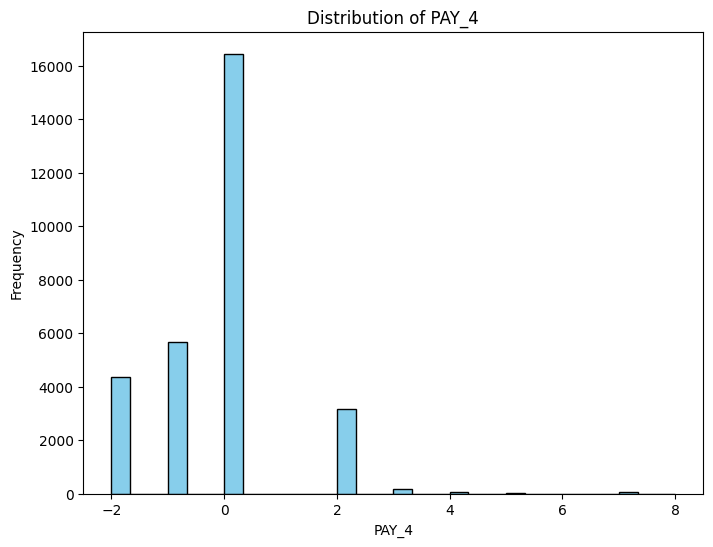

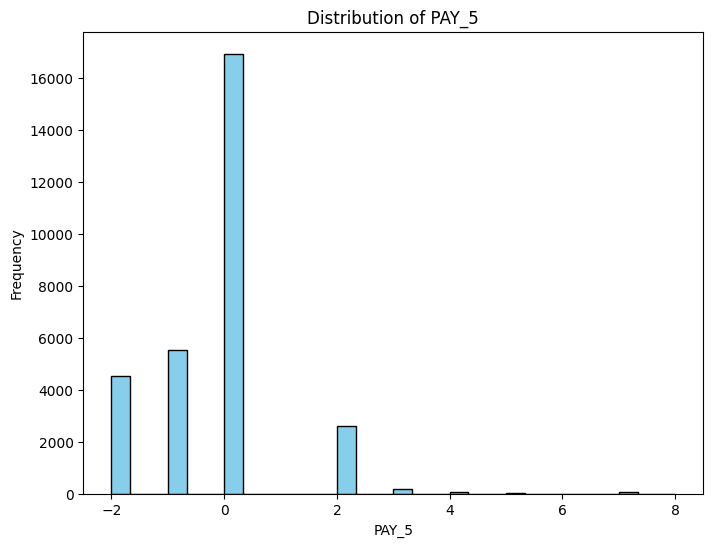

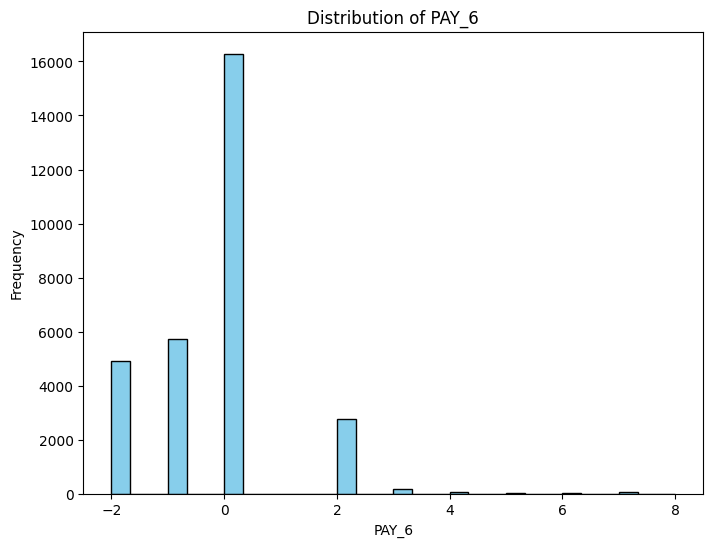

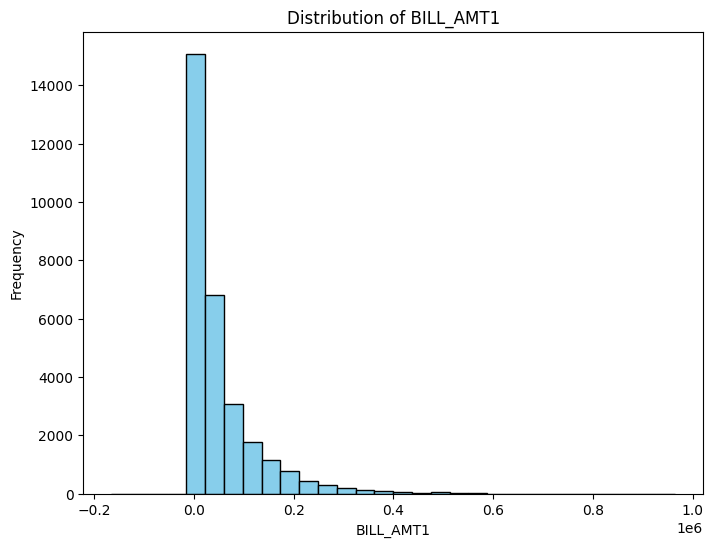

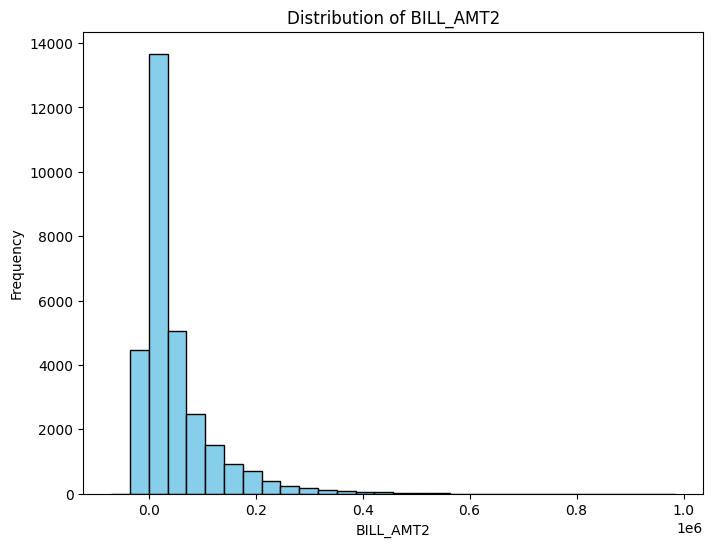

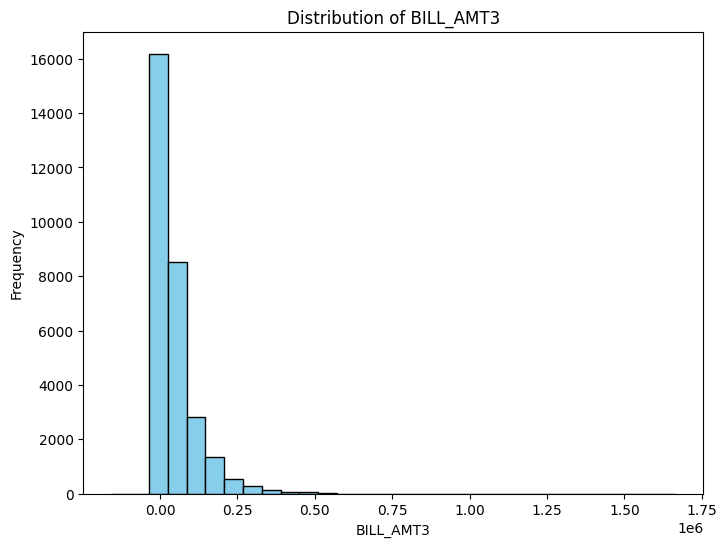

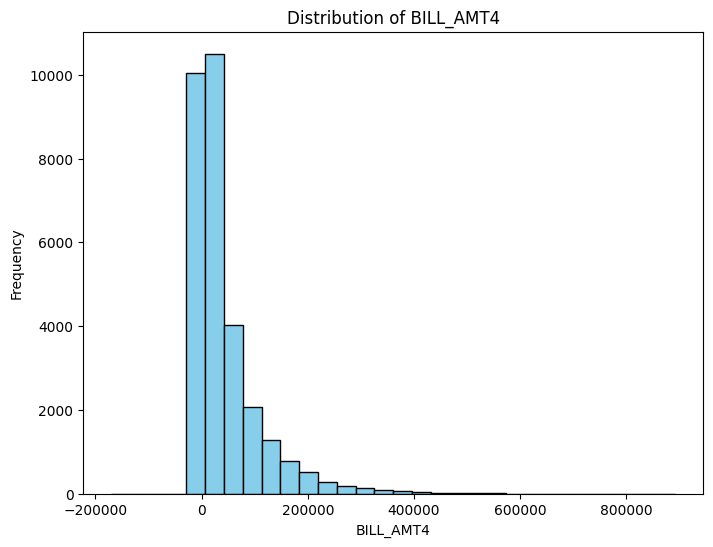

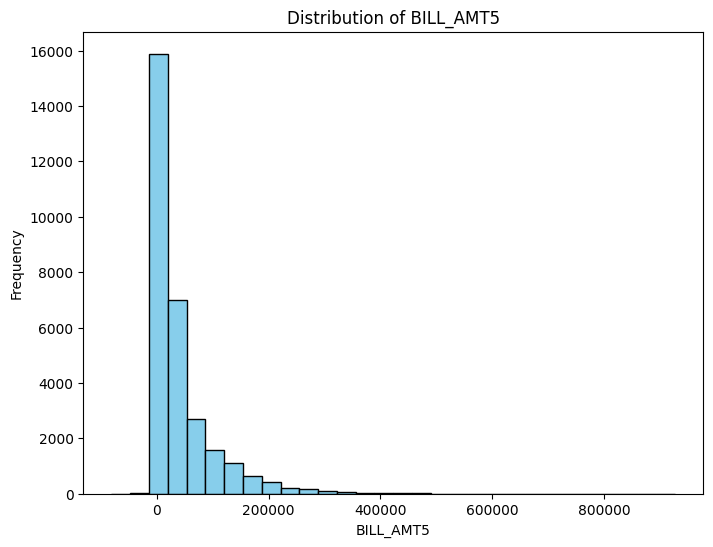

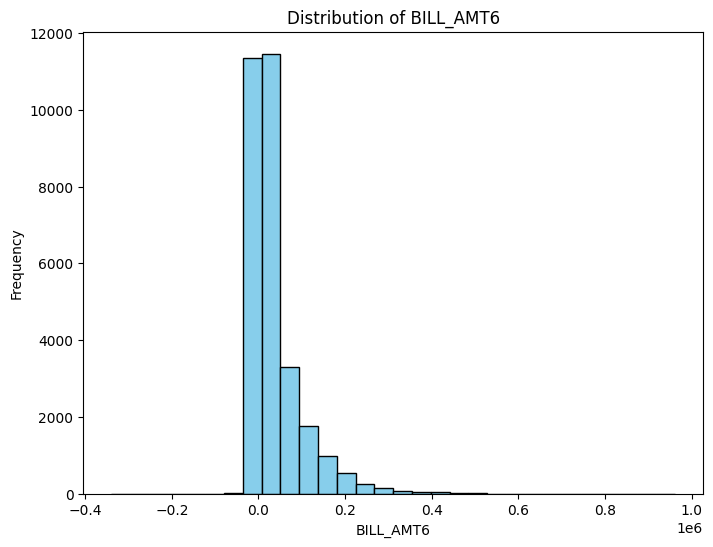

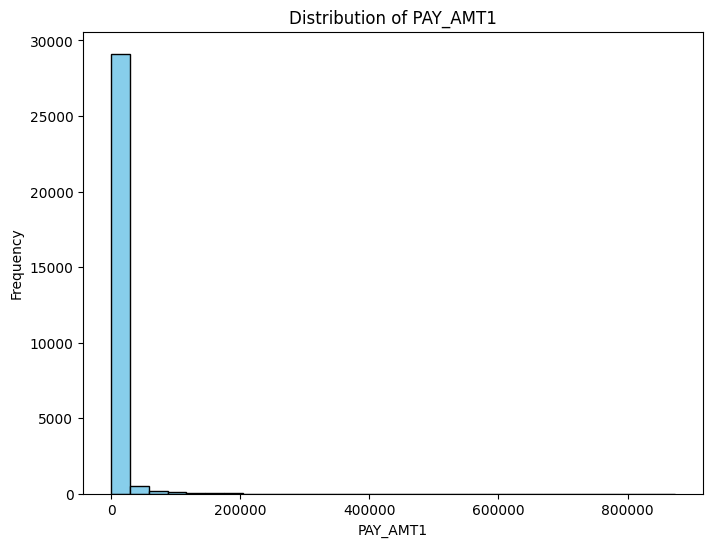

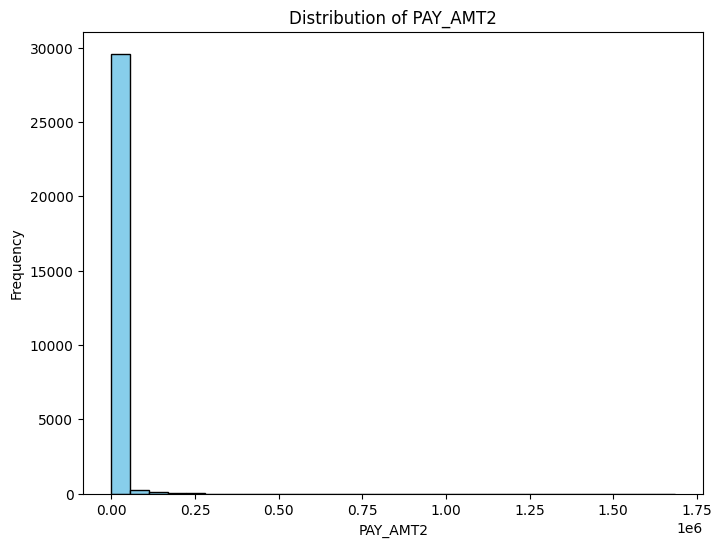

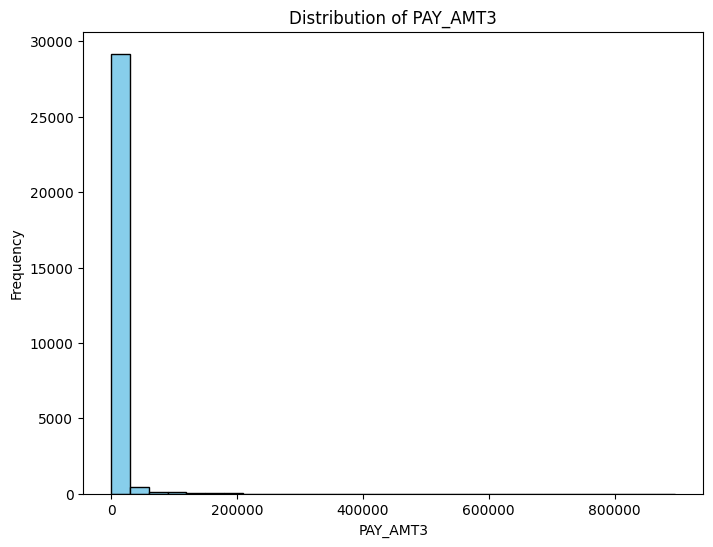

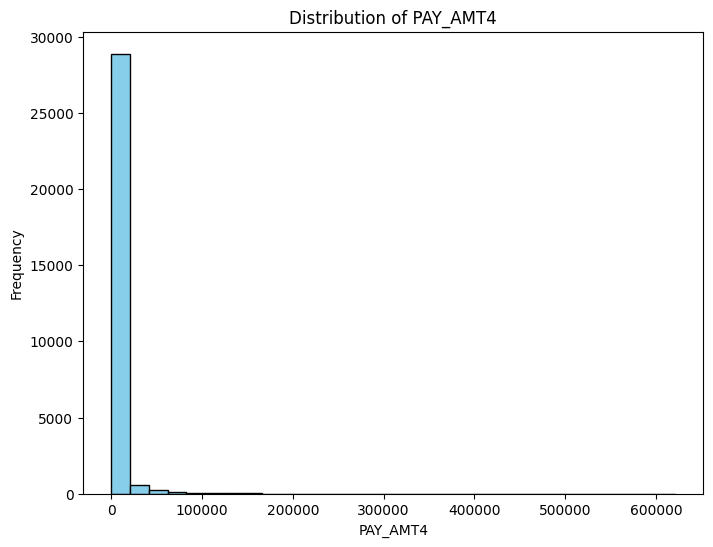

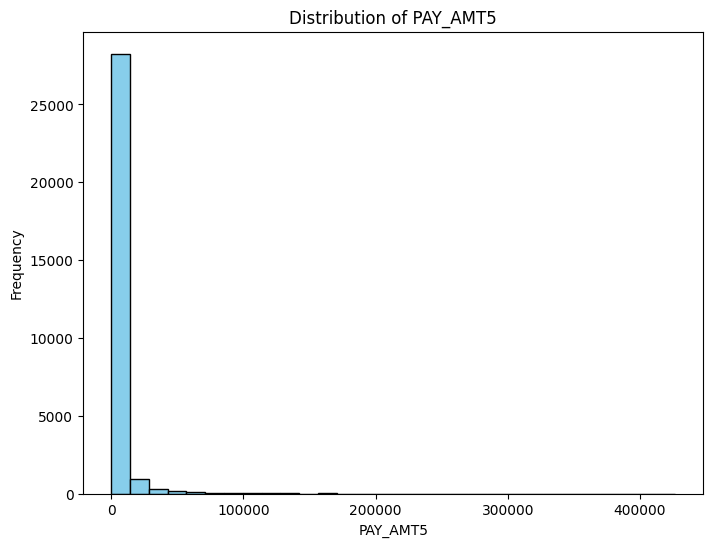

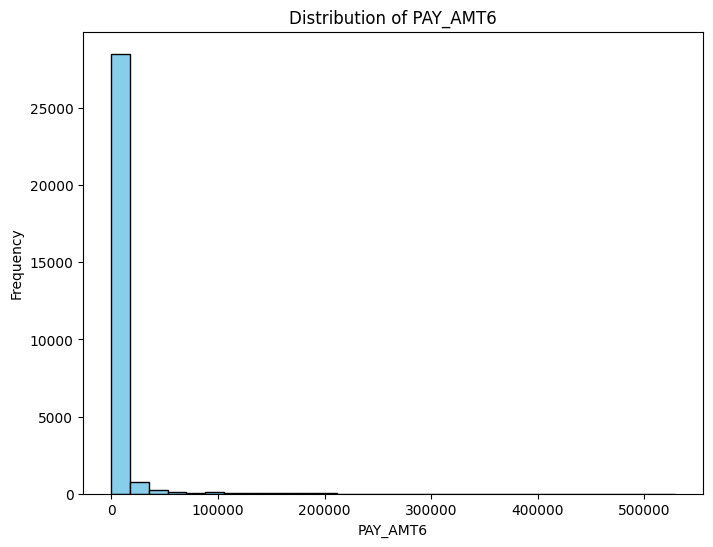

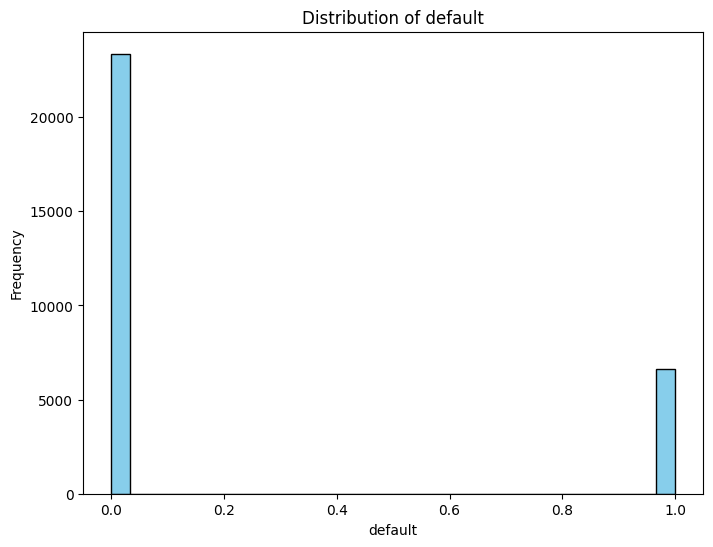

In [316]:
frequency_dist(data)

### There is not missing value

In [317]:
from scipy.stats import kstest
def distribution_check(data):
  normal_dist = []
  not_normal_dist = []

  for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
      kstest_stat, kstest_p_value = kstest(data[col], 'norm')
      if kstest_p_value > 0.05:
        normal_dist.append(col)
      else:
        not_normal_dist.append(col)
  return normal_dist, not_normal_dist

In [318]:
normal_dist_cols, not_normal_dist_cols = distribution_check(data)

In [319]:
normal_dist_cols

[]

- there is not normal distributed data

In [320]:
not_normal_dist_cols

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

# Outlier detection for Logistic Regression

In [321]:
num_but_cat = [x for x in data.columns if (len(data[x].value_counts())<12) and (x!='default')]

In [322]:
num_but_cat

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [323]:
def show_outliers(data):
    for x in data.columns:
        if (data[x].dtype != object) and (x not in num_but_cat):
            sns.boxplot(data=data, x=data[x], color='r')
            plt.title(f'Boxplot of {x}')
            plt.show()

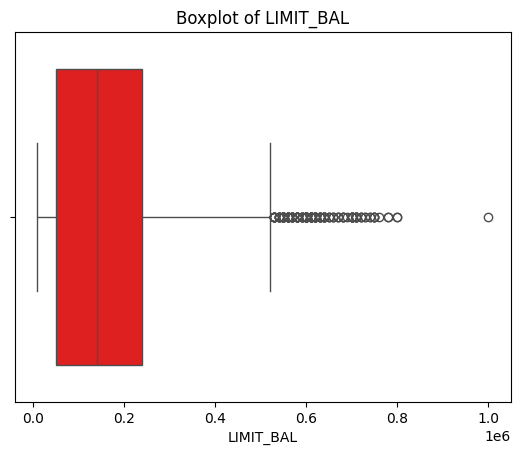

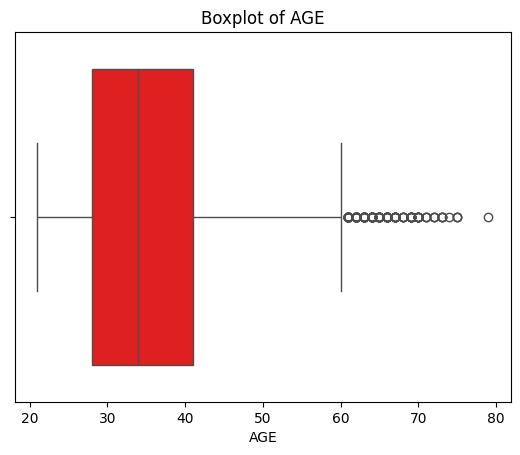

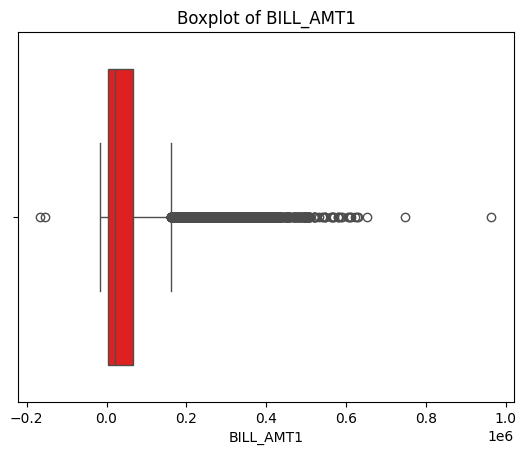

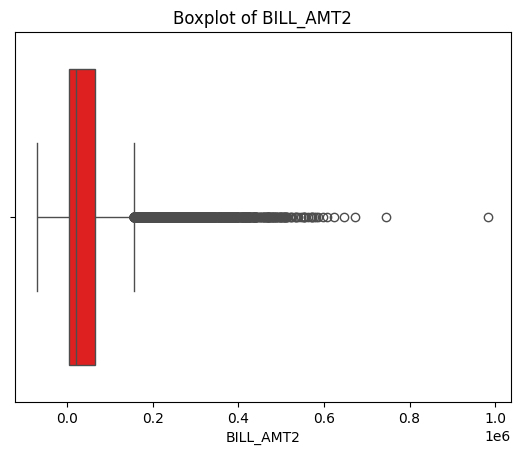

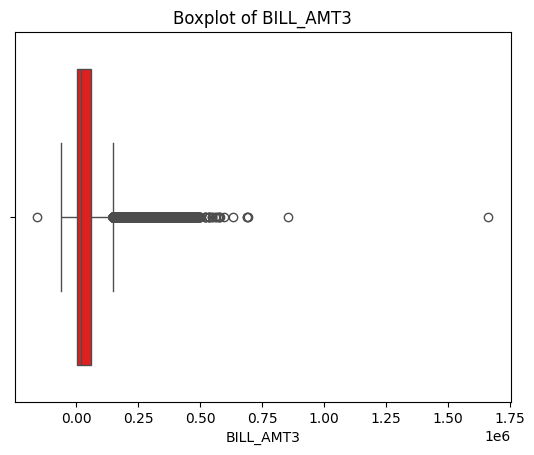

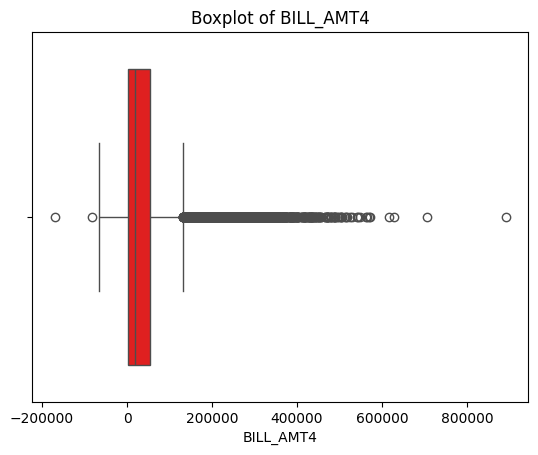

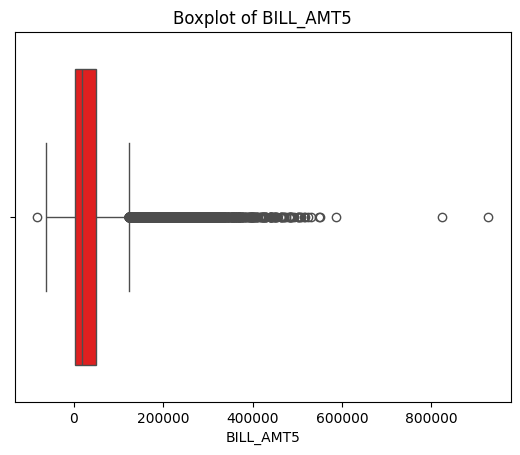

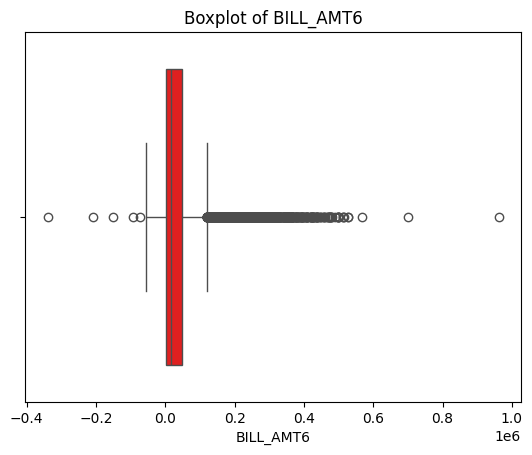

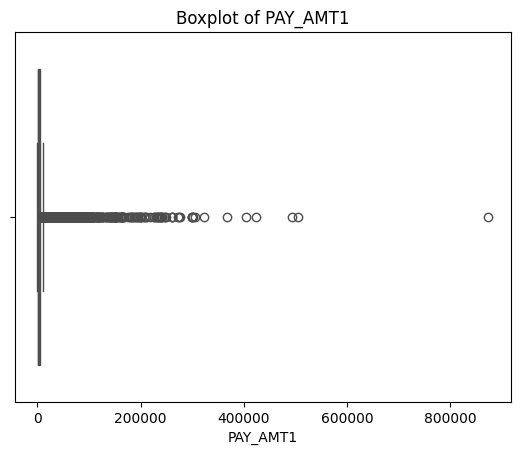

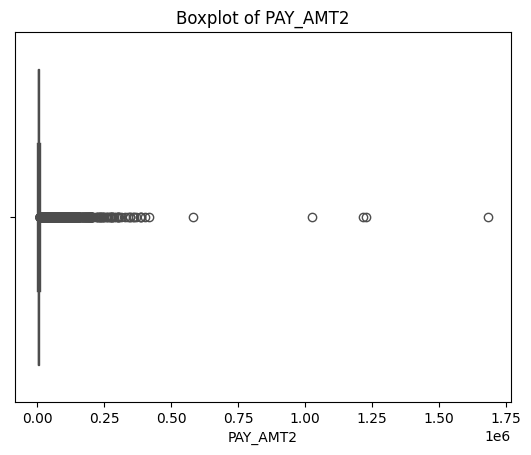

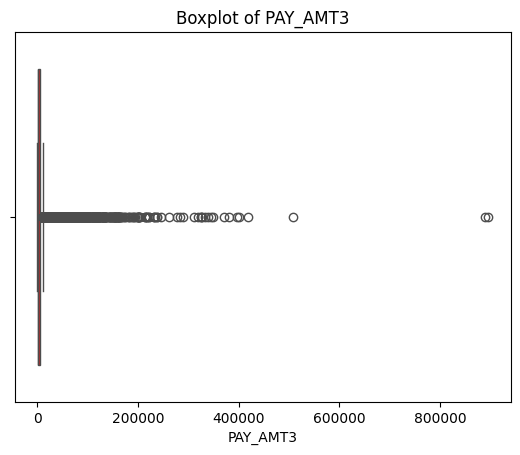

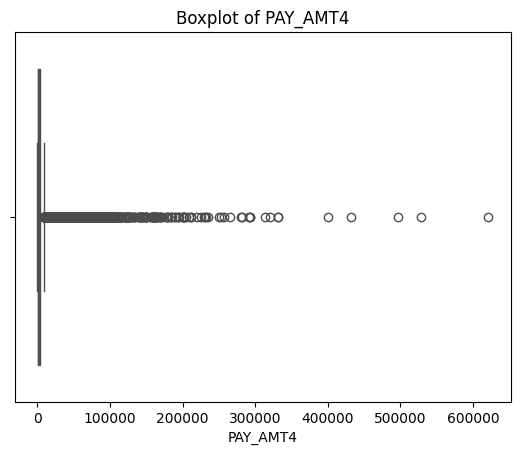

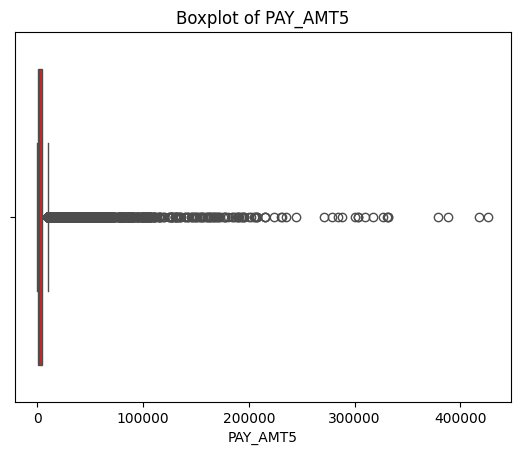

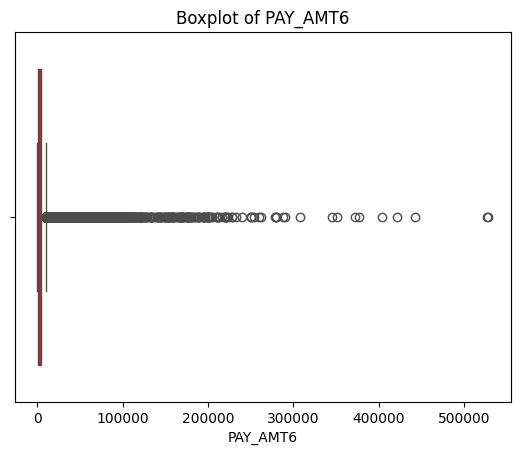

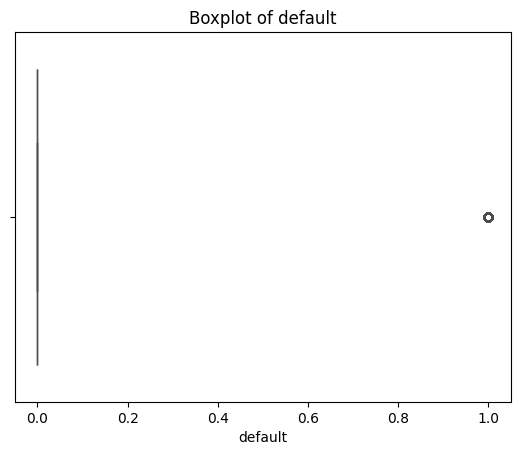

In [324]:
show_outliers(data)

In [325]:
# data will be used for tree based models
# for logistic regression and svc data
data_log = data.copy()

In [326]:
num_but_cat_log = [x for x in data_log.columns if (len(data_log[x].value_counts())<12)]

In [327]:
num_but_cat_log

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'default']

In [328]:
outlier_cols = [x for x in data_log.columns if (data_log[x].dtype != object) and (x not in num_but_cat_log)]
numeric_data = data_log[outlier_cols]
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
data_log[outlier_cols] = np.where(data_log[outlier_cols] < lower, lower, data_log[outlier_cols])
data_log[outlier_cols] = np.where(data_log[outlier_cols] > upper, upper, data_log[outlier_cols])


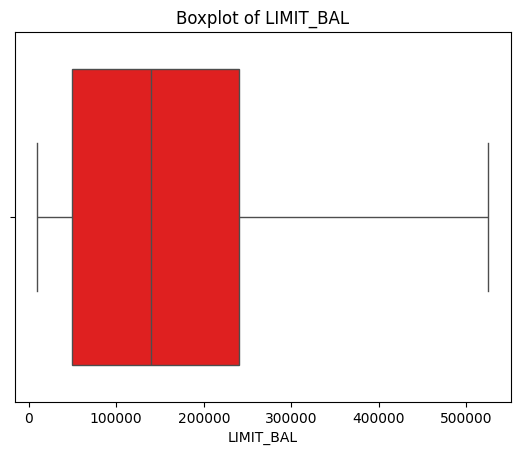

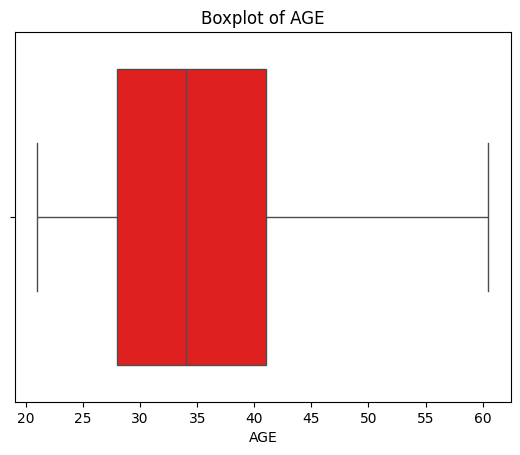

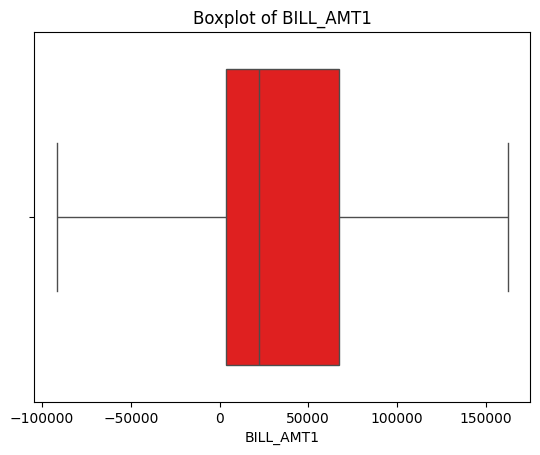

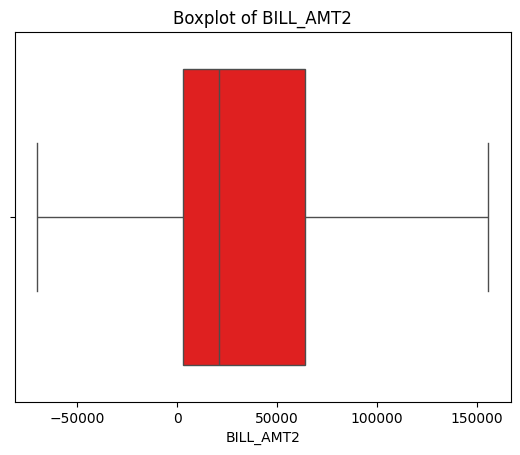

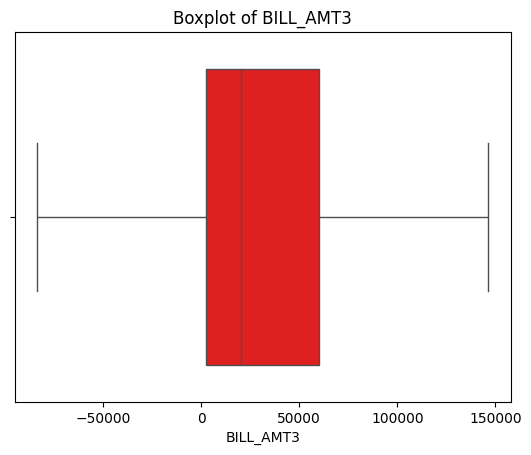

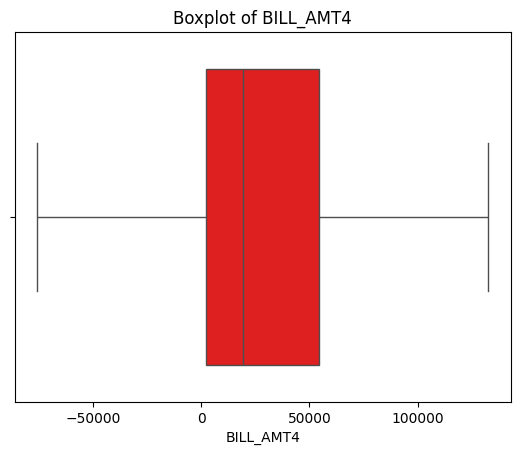

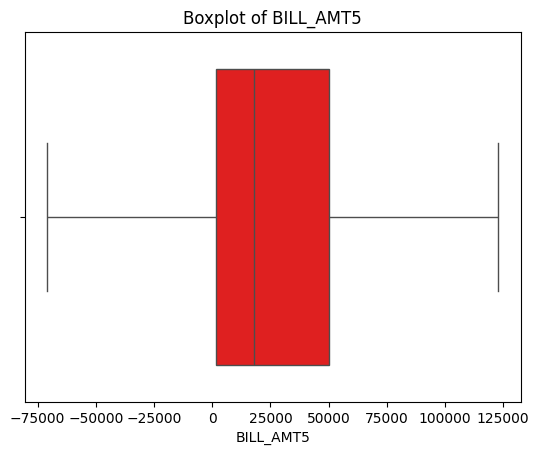

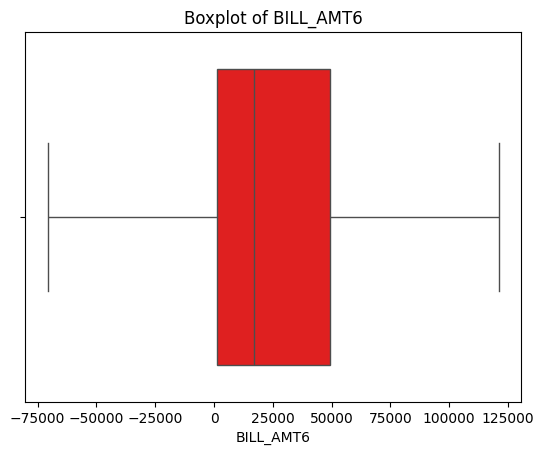

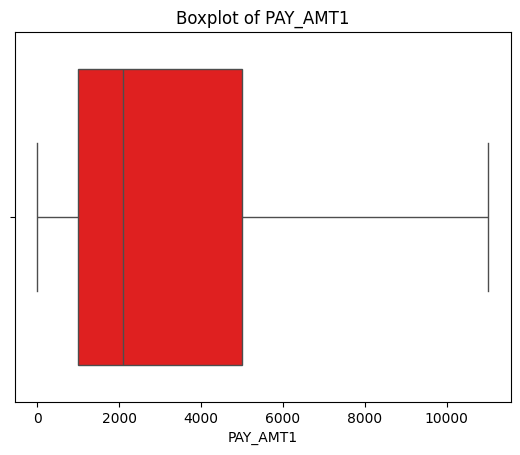

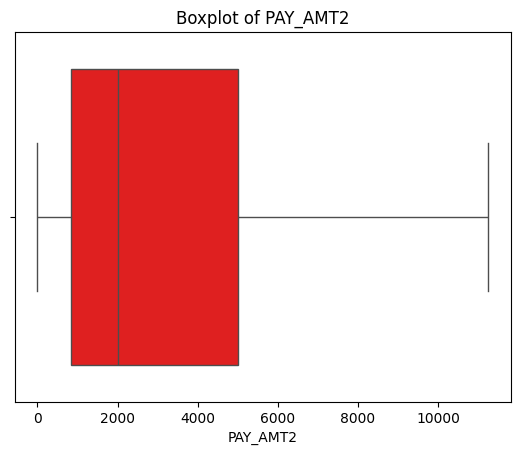

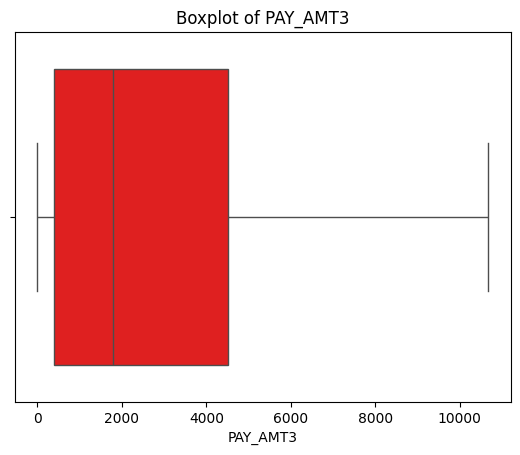

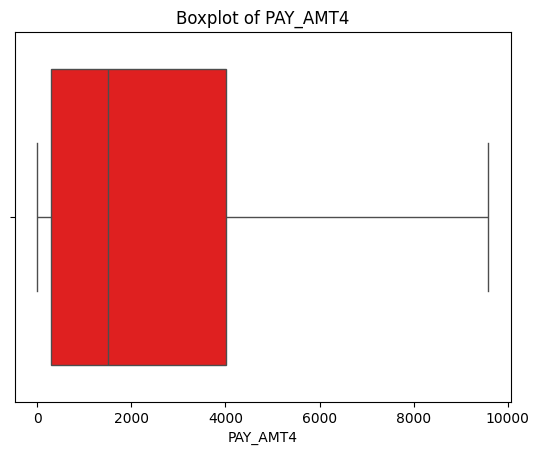

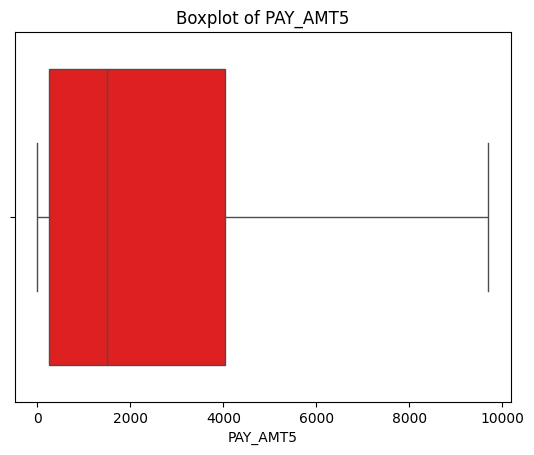

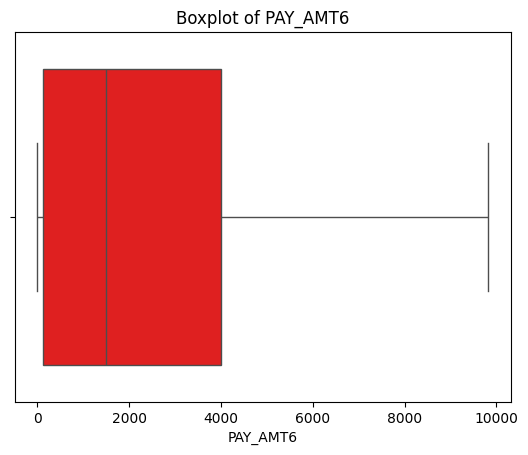

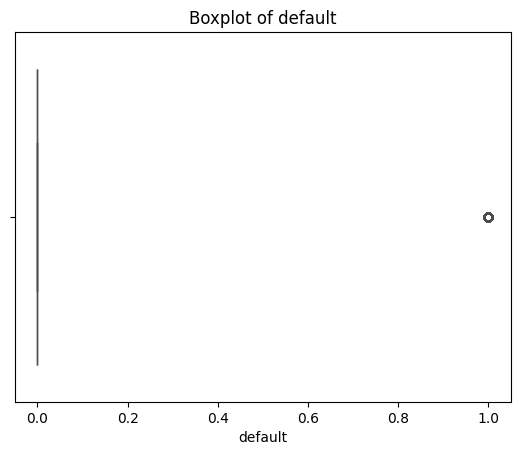

In [329]:
show_outliers(data_log)

# Feature engineering

In [330]:
data_log.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000.0000,female,university,married,24.0000,2,2,-1,-1,-2,-2,3913.0000,3102.0000,689.0000,0.0000,0.0000,0.0000,0.0000,689.0000,0.0000,0.0000,0.0000,0.0000,1
1,120000.0000,female,university,single,26.0000,-1,2,0,0,0,2,2682.0000,1725.0000,2682.0000,3272.0000,3455.0000,3261.0000,0.0000,1000.0000,1000.0000,1000.0000,0.0000,2000.0000,1
2,90000.0000,female,university,single,34.0000,0,0,0,0,0,0,29239.0000,14027.0000,13559.0000,14331.0000,14948.0000,15549.0000,1518.0000,1500.0000,1000.0000,1000.0000,1000.0000,5000.0000,0
3,50000.0000,female,university,married,37.0000,0,0,0,0,0,0,46990.0000,48233.0000,49291.0000,28314.0000,28959.0000,29547.0000,2000.0000,2019.0000,1200.0000,1100.0000,1069.0000,1000.0000,0
4,50000.0000,male,university,married,57.0000,-1,0,-1,0,0,0,8617.0000,5670.0000,35835.0000,20940.0000,19146.0000,19131.0000,2000.0000,11250.5000,10000.0000,9000.0000,689.0000,679.0000,0


In [331]:
def feature_engineering(data):
    stat_methods = {
        'mean': np.mean,
        'median': np.median,
        'min': np.min,
        'max': np.max,
        'var': np.var
    }

    calculation_cols = ['LIMIT_BAL',	'AGE', 'BILL_AMT5', 'PAY_AMT5'] # when I put whole data it take so much time
    result_data = data.copy()
    column_groups = {
        ('SEX', 'EDUCATION'): calculation_cols,
        ('EDUCATION', 'MARRIAGE'): calculation_cols,
        ('SEX', 'MARRIAGE'): calculation_cols
    }

    for stat_name, stat_func in stat_methods.items():
        for group_cols, calc_cols in column_groups.items():
            print(f"Processing: {stat_name}, Grouping: {group_cols}")

            grouped_data = data.groupby(list(group_cols))[calc_cols].agg(stat_func).reset_index()

            agg_col_names = [f'{col}_{stat_name}_by_' + '_'.join(group_cols) for col in calc_cols]
            grouped_data.columns = list(group_cols) + agg_col_names

            # Merge aggregated data back into the result_data dataframe on group_cols
            result_data = pd.merge(result_data, grouped_data, on=list(group_cols), how='left')

    return result_data

In [332]:
data_log = feature_engineering(data_log)

Processing: mean, Grouping: ('SEX', 'EDUCATION')
Processing: mean, Grouping: ('EDUCATION', 'MARRIAGE')
Processing: mean, Grouping: ('SEX', 'MARRIAGE')
Processing: median, Grouping: ('SEX', 'EDUCATION')
Processing: median, Grouping: ('EDUCATION', 'MARRIAGE')
Processing: median, Grouping: ('SEX', 'MARRIAGE')
Processing: min, Grouping: ('SEX', 'EDUCATION')
Processing: min, Grouping: ('EDUCATION', 'MARRIAGE')
Processing: min, Grouping: ('SEX', 'MARRIAGE')
Processing: max, Grouping: ('SEX', 'EDUCATION')
Processing: max, Grouping: ('EDUCATION', 'MARRIAGE')
Processing: max, Grouping: ('SEX', 'MARRIAGE')
Processing: var, Grouping: ('SEX', 'EDUCATION')
Processing: var, Grouping: ('EDUCATION', 'MARRIAGE')
Processing: var, Grouping: ('SEX', 'MARRIAGE')


In [333]:
data_log.isnull().sum()

LIMIT_BAL                                 0
SEX                                       0
EDUCATION                                 0
MARRIAGE                                  0
AGE                                       0
PAY_0                                     0
PAY_2                                     0
PAY_3                                     0
PAY_4                                     0
PAY_5                                     0
PAY_6                                     0
BILL_AMT1                                 0
BILL_AMT2                                 0
BILL_AMT3                                 0
BILL_AMT4                                 0
BILL_AMT5                                 0
BILL_AMT6                                 0
PAY_AMT1                                  0
PAY_AMT2                                  0
PAY_AMT3                                  0
PAY_AMT4                                  0
PAY_AMT5                                  0
PAY_AMT6                        

In [334]:
normal_dist, not_normal_dist_cols = distribution_check(data_log)

In [335]:
normal_dist

[]

- if we don't have any normal distributed values, we use spearman correlation

## Target correlation check

In [336]:
def target_correlation(data, target, threshold=0.05):
    corr_matrix = data.corr(method='spearman', numeric_only=True)

    target_correlations = corr_matrix[target].abs() > threshold

    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)

    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})

    result_explaining_target.reset_index(drop=True, inplace=True)

    # return result_explaining_target.sort_values(by='Correlation with Target', ascending=False)
    return result_explaining_target['Variable'].tolist() + [target] + list(data.select_dtypes(exclude='number').columns)

In [337]:
target_result = target_correlation(data_log, 'default')
target_result

['LIMIT_BAL',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'LIMIT_BAL_mean_by_SEX_EDUCATION',
 'PAY_AMT5_mean_by_SEX_EDUCATION',
 'LIMIT_BAL_median_by_SEX_EDUCATION',
 'PAY_AMT5_median_by_SEX_EDUCATION',
 'LIMIT_BAL_median_by_EDUCATION_MARRIAGE',
 'AGE_var_by_SEX_EDUCATION',
 'BILL_AMT5_var_by_SEX_EDUCATION',
 'PAY_AMT5_var_by_SEX_EDUCATION',
 'PAY_AMT5_var_by_EDUCATION_MARRIAGE',
 'default',
 'SEX',
 'EDUCATION',
 'MARRIAGE']

In [338]:
data_log = data_log[target_result]

## Intercorrelation check

In [339]:
def non_intercorrelated_variables(data, target, threshold=0.7):
    for col in data.columns:
        if col != target:
            corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only=True)

            low_correlated_variables = (np.abs(corr_matrix) < threshold) & (corr_matrix != 1.0)

            independent_variable_pairs = np.where(low_correlated_variables)

            not_intercorrelated_independent = pd.DataFrame({
                'Variable': corr_matrix.index[independent_variable_pairs[0]]
            })
    columns_to_keep = np.unique(not_intercorrelated_independent['Variable'].unique().tolist() + list(data.select_dtypes(exclude='number').columns) + [target])
    return columns_to_keep


In [340]:
intercorrelation_result = non_intercorrelated_variables(data_log, 'default')

In [341]:
data_log = data_log[intercorrelation_result]

In [342]:
data_log.shape

(30000, 26)

In [343]:
print()

In [344]:
# data for svc model
data_svc = data_log.copy()

# WOE transformation for logistic regression data

In [345]:
from os import SEEK_DATA
data_log = data_svc.copy()

In [346]:
num_but_cat_log = [x for x in data_log.columns if (len(data_log[x].value_counts())<12) and (x!='default')]

In [347]:
def woe_transform(data, target):
    for var in data.columns:
        if var == target:
                continue
            
        if data[var].dtypes != object or (var not in num_but_cat_log):
            q1 = data[var].quantile(0.25)
            q2 = data[var].quantile(0.5)
            q3 = data[var].quantile(0.75)
            ranges = [-np.inf, q1, q2, q3, np.inf]
            
            data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')
            grouped = data.groupby(['category_' + var, target])[target].count().unstack().reset_index()
            grouped['positive_prop'] = grouped[0] / grouped[0].sum()
            grouped['negative_prop'] = grouped[1] / grouped[1].sum()
            grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
            grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
            data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
            
        elif data[var].dtypes == object or (var in num_but_cat_log):
            grouped = data.groupby([var, target], observed=True)[target].count().unstack().reset_index()
            grouped['positive_prop'] = grouped[0] / grouped[0].sum()
            grouped['negative_prop'] = grouped[1] / grouped[1].sum()
            
            grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
            grouped.rename(columns={'woe':var+'_woe'}, inplace=True)
            data = data.merge(grouped[[var,var+'_woe']], how='left', on=var)

    return data


# def woe_transform(data, target):
#     num_but_cat = [x for x in data.columns if ((len(data[x].value_counts()) <= 4) and (x != target)) or (pd.api.types.is_categorical_dtype(data[x]))]
#     for var in data.columns:
#         if var == target:
#             continue
#         # Handle categorical columns and numeric columns with few unique values
#         if  (data[var].dtype == object) or (var in num_but_cat) or (data[var].dtype == 'category'):
#             grouped = data.groupby([var, target])[target].count().unstack().fillna(0)
#             grouped.columns = ['negative', 'positive']  # Assuming '0' is negative and '1' is positive
#             grouped['positive_prop'] = grouped['positive'] / grouped['positive'].sum()
#             grouped['negative_prop'] = grouped['negative'] / grouped['negative'].sum()
#             grouped['woe'] = np.log((grouped['positive_prop'] / grouped['negative_prop']).replace(0, np.nan)).replace(np.nan, 0)
#             grouped.reset_index(inplace=True)
#             grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
#             data = data.merge(grouped[[var, var + '_woe']], how='left', on=var)
#         # Handle numeric columns that are not categorized as 'num_but_cat'
#         else:
    #         q1 = data[var].quantile(0.25)
    #         q2 = data[var].quantile(0.5)
    #         q3 = data[var].quantile(0.75)
    #         ranges = [-np.inf, q1, q2, q3, np.inf]
    
    #         data['category_' + var] = pd.cut(data[var], bins=ranges, duplicates='drop')
    #         grouped = data.groupby(['category_' + var, target])[target].count().unstack().fillna(0)
    #         grouped.columns = ['negative', 'positive']  # Assuming '0' is negative and '1' is positive
    #         grouped['positive_prop'] = grouped['positive'] / grouped['positive'].sum()
    #         grouped['negative_prop'] = grouped['negative'] / grouped['negative'].sum()
    #         grouped['woe'] = np.log((grouped['positive_prop'] / grouped['negative_prop']).replace(0, np.nan)).replace(np.nan, 0)
    #         grouped.reset_index(inplace=True)
    #         grouped.rename(columns={'woe': var + '_woe'}, inplace=True)
    #         data = data.merge(grouped[['category_' + var, var + '_woe']], how='left', on='category_' + var)
    #         data.drop(columns=['category_' + var], inplace=True)
    
    # return data

In [348]:
data_log = woe_transform(data_log, 'default')

In [349]:
data_log.isnull().sum()

AGE_var_by_SEX_EDUCATION                            0
BILL_AMT5_var_by_SEX_EDUCATION                      0
EDUCATION                                           0
LIMIT_BAL                                           0
LIMIT_BAL_mean_by_SEX_EDUCATION                     0
LIMIT_BAL_median_by_EDUCATION_MARRIAGE              0
LIMIT_BAL_median_by_SEX_EDUCATION                   0
MARRIAGE                                            0
PAY_0                                               0
PAY_2                                               0
PAY_3                                               0
PAY_4                                               0
PAY_5                                               0
PAY_6                                               0
PAY_AMT1                                            0
PAY_AMT2                                            0
PAY_AMT3                                            0
PAY_AMT4                                            0
PAY_AMT5                    

In [350]:
data_log = data_log.dropna(subset=['EDUCATION_woe'], axis=0)
# i have got error such as it has np.inf value
data_log.replace([np.inf, -np.inf], np.nan, inplace=True)
data_log.dropna(axis=1, inplace=True)

In [351]:
# intercorrelation_result = non_intercorrelated_variables(data_log, 'default') # it take so much time that's why I didn't run but we should do
# data_log = data_log[intercorrelation_result]

### Logistic Regression feature selection

In [352]:
woe_features = data_log.filter(regex='_woe$', axis=1)
woe_features = woe_features.columns

In [353]:
inputs_log = data_log[woe_features]
outputs_log = data_log[['default']]

# Variance Inflation Factor

In [354]:
# vif check
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [355]:
# for x in inputs_log:
#   print(x)

In [356]:
vif_data = pd.DataFrame()
vif_data["feature"] = [
  'AGE_var_by_SEX_EDUCATION_woe',
  'BILL_AMT5_var_by_SEX_EDUCATION_woe',
  'EDUCATION_woe',
  'LIMIT_BAL_woe',
  'LIMIT_BAL_mean_by_SEX_EDUCATION_woe',
  'LIMIT_BAL_median_by_EDUCATION_MARRIAGE_woe',
  'LIMIT_BAL_median_by_SEX_EDUCATION_woe',
  'MARRIAGE_woe',
  'PAY_0_woe',
  'PAY_2_woe',
  'PAY_3_woe',
  'PAY_4_woe',
  'PAY_5_woe',
  'PAY_6_woe',
  'PAY_AMT1_woe',
  'PAY_AMT2_woe',
  'PAY_AMT3_woe',
  'PAY_AMT4_woe',
  'PAY_AMT5_woe',
  'PAY_AMT5_mean_by_SEX_EDUCATION_woe',
  'PAY_AMT5_median_by_SEX_EDUCATION_woe',
  'PAY_AMT5_var_by_EDUCATION_MARRIAGE_woe',
  'PAY_AMT5_var_by_SEX_EDUCATION_woe',
  'PAY_AMT6_woe',
  'SEX_woe',
]
vif_data["VIF"] = [variance_inflation_factor(inputs_log.values, i) for i in range(len(vif_data['feature']))]
print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                       feature       VIF
0                 AGE_var_by_SEX_EDUCATION_woe       inf
1           BILL_AMT5_var_by_SEX_EDUCATION_woe       inf
2                                EDUCATION_woe       inf
3                                LIMIT_BAL_woe    1.3460
4          LIMIT_BAL_mean_by_SEX_EDUCATION_woe       inf
5   LIMIT_BAL_median_by_EDUCATION_MARRIAGE_woe 7552.2325
6        LIMIT_BAL_median_by_SEX_EDUCATION_woe       inf
7                                 MARRIAGE_woe    2.2972
8                                    PAY_0_woe    1.9984
9                                    PAY_2_woe    2.8912
10                                   PAY_3_woe    2.7028
11                                   PAY_4_woe    2.8052
12                                   PAY_5_woe    2.9229
13                                   PAY_6_woe    2.1352
14                                PAY_AMT1_woe    1.9304
15                                PAY_AMT2_woe    2.0431
16                             

In [357]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

def vif_selection(data, threshold=5.0):
    non_numeric_cols = data.select_dtypes(exclude='number').columns.tolist()
    X = data.select_dtypes(include='number').copy()
    features_to_keep = list(X.columns)
    vif_data = calculate_vif(X)

    while vif_data['VIF'].max() > threshold:
        max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']

        X = X.drop(max_vif_feature, axis=1)
        features_to_keep.remove(max_vif_feature)
        vif_data = calculate_vif(X)

        print(f'Removed feature: {max_vif_feature} with VIF: {vif_data["VIF"].max()}')
        print(f'Remaining features: {len(X.columns)}')

    final_vif_data = pd.DataFrame({
        'Feature': X.columns,
        'VIF': vif_data['VIF']
    })

    final_features = final_vif_data['Feature'].tolist() + non_numeric_cols

    return final_features # we may put X[final_features] but I wanted to see the columns

In [358]:
vif_cols_log = vif_selection(inputs_log, 9)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Removed feature: AGE_var_by_SEX_EDUCATION_woe with VIF: 27731956.31788246
Remaining features: 24
Removed feature: LIMIT_BAL_mean_by_SEX_EDUCATION_woe with VIF: 22340.026305062038
Remaining features: 23
Removed feature: BILL_AMT5_var_by_SEX_EDUCATION_woe with VIF: 7527.330133524186
Remaining features: 22
Removed feature: LIMIT_BAL_median_by_EDUCATION_MARRIAGE_woe with VIF: 123.06489840282109
Remaining features: 21
Removed feature: PAY_AMT5_mean_by_SEX_EDUCATION_woe with VIF: 65.72137813075962
Remaining features: 20
Removed feature: PAY_AMT5_median_by_SEX_EDUCATION_woe with VIF: 17.501892561435746
Remaining features: 19
Removed feature: PAY_AMT5_var_by_SEX_EDUCATION_woe with VIF: 6.493595923334805
Remaining features: 18


In [359]:
vif_cols_log

['EDUCATION_woe',
 'LIMIT_BAL_woe',
 'LIMIT_BAL_median_by_SEX_EDUCATION_woe',
 'MARRIAGE_woe',
 'PAY_0_woe',
 'PAY_2_woe',
 'PAY_3_woe',
 'PAY_4_woe',
 'PAY_5_woe',
 'PAY_6_woe',
 'PAY_AMT1_woe',
 'PAY_AMT2_woe',
 'PAY_AMT3_woe',
 'PAY_AMT4_woe',
 'PAY_AMT5_woe',
 'PAY_AMT5_var_by_EDUCATION_MARRIAGE_woe',
 'PAY_AMT6_woe',
 'SEX_woe']

In [360]:
inputs_log = inputs_log[vif_cols_log]

### Support Vector Classifier feature

In [361]:
data_svc.head()

,AGE_var_by_SEX_EDUCATION,BILL_AMT5_var_by_SEX_EDUCATION,EDUCATION,LIMIT_BAL,LIMIT_BAL_mean_by_SEX_EDUCATION,LIMIT_BAL_median_by_EDUCATION_MARRIAGE,LIMIT_BAL_median_by_SEX_EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT5_mean_by_SEX_EDUCATION,PAY_AMT5_median_by_SEX_EDUCATION,PAY_AMT5_var_by_EDUCATION_MARRIAGE,PAY_AMT5_var_by_SEX_EDUCATION,PAY_AMT6,SEX,default
0,75.1270,1582992387.8131,university,20000.0000,154902.4954,140000.0000,130000.0000,married,2,2,-1,-1,-2,-2,0.0000,689.0000,0.0000,0.0000,0.0000,2717.5853,1637.5000,9116174.1266,8950765.0735,0.0000,female,1
1,75.1270,1582992387.8131,university,120000.0000,154902.4954,100000.0000,130000.0000,single,-1,2,0,0,0,2,0.0000,1000.0000,1000.0000,1000.0000,0.0000,2717.5853,1637.5000,8444908.6709,8950765.0735,2000.0000,female,1
2,75.1270,1582992387.8131,university,90000.0000,154902.4954,100000.0000,130000.0000,single,0,0,0,0,0,0,1518.0000,1500.0000,1000.0000,1000.0000,1000.0000,2717.5853,1637.5000,8444908.6709,8950765.0735,5000.0000,female,0
3,75.1270,1582992387.8131,university,50000.0000,154902.4954,140000.0000,130000.0000,married,0,0,0,0,0,0,2000.0000,2019.0000,1200.0000,1100.0000,1069.0000,2717.5853,1637.5000,9116174.1266,8950765.0735,1000.0000,female,0
4,81.2061,1517340939.3986,university,50000.0000,133466.6915,140000.0000,90000.0000,married,-1,0,-1,0,0,0,2000.0000,11250.5000,10000.0000,9000.0000,689.0000,2480.0251,1320.0000,9116174.1266,8413270.8196,679.0000,male,0


In [362]:
data_svc_dummied = pd.get_dummies(data_svc, drop_first = True)

In [363]:
inputs_svc = data_svc_dummied.drop('default', axis=1)
outputs_svc = data_svc_dummied[['default']]

In [364]:
vif_cols_svc = vif_selection(inputs_svc, 9)

Removed feature: PAY_AMT5_var_by_SEX_EDUCATION with VIF: 2492.972550013814
Remaining features: 21
Removed feature: LIMIT_BAL_mean_by_SEX_EDUCATION with VIF: 2080.697303511191
Remaining features: 20
Removed feature: PAY_AMT5_mean_by_SEX_EDUCATION with VIF: 685.1814737923953
Remaining features: 19
Removed feature: PAY_AMT5_var_by_EDUCATION_MARRIAGE with VIF: 208.97302014150083
Remaining features: 18
Removed feature: BILL_AMT5_var_by_SEX_EDUCATION with VIF: 121.29044609532225
Remaining features: 17
Removed feature: PAY_AMT5_median_by_SEX_EDUCATION with VIF: 34.52224044379237
Remaining features: 16
Removed feature: LIMIT_BAL_median_by_EDUCATION_MARRIAGE with VIF: 5.7258168427274665
Remaining features: 15


In [365]:
inputs_svc = inputs_svc[vif_cols_svc]

## Tree based models feature

In [366]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [367]:
data_tr_dummied = pd.get_dummies(data, drop_first = True)

In [368]:
inputs_tr = data_tr_dummied.drop('default', axis=1)
outputs_tr = data_tr_dummied[['default']]

# Scaling

In [369]:
from sklearn.preprocessing import StandardScaler
def scale_data(data_train, data_test=None):
    scaler = StandardScaler()
    scaled_train = scaler.fit_transform(data_train)
    scaled_train_df = pd.DataFrame(scaled_train, columns=data_train.columns, index=data_train.index)

    if data_test is not None:
        scaled_test = scaler.transform(data_test)
        scaled_test_df = pd.DataFrame(scaled_test, columns=data_test.columns, index=data_test.index)
        return scaled_train_df, scaled_test_df
    else:
        return scaled_train_df

In [370]:
# # Count of positive and negative infinity values for each column
# print(np.isinf(inputs_log['LIMIT_BAL_min_by_EDUCATION_MARRIAGE_woe']).sum())

In [371]:
# inputs_log[inputs_log['LIMIT_BAL_min_by_EDUCATION_MARRIAGE_woe']==np.inf]['LIMIT_BAL_min_by_EDUCATION_MARRIAGE_woe']

# Train test split

In [372]:
from sklearn.model_selection import train_test_split

In [373]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(inputs_log, outputs_log, test_size = 0.25, random_state=42, stratify=outputs_log)
X_train_log, X_test_log = scale_data(X_train_log, X_test_log)
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(inputs_svc, outputs_svc, test_size = 0.25, random_state=42, stratify=outputs_svc)
X_train_svc, X_test_svc = scale_data(X_train_svc, X_test_svc)
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(inputs_tr, outputs_tr, test_size = 0.25, random_state=42, stratify=outputs_tr)
X_train_tr, X_test_tr = scale_data(X_train_tr, X_test_tr)

# Train and evaluate function

In [374]:
from sklearn.metrics import roc_auc_score

In [375]:
def train_test_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict_proba(X_train)[:, 1]
    y_pred_test = model.predict_proba(X_test)[:, 1]

    roc_train = roc_auc_score(y_train, y_pred_train)
    gini_train = roc_train*2-1

    roc_test = roc_auc_score(y_test, y_pred_test)
    gini_test = roc_test*2-1

    return gini_train, gini_test

# Default models

In [376]:
# !pip install catboost

In [377]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [378]:
default_models = []

log_reg_def = LogisticRegression()
svc_def = SVC(probability=True)
dec_tree_def = DecisionTreeClassifier()
rfc_def = RandomForestClassifier()
xgb_def = XGBClassifier()
lgb_def = LGBMClassifier()
catboost_def = CatBoostClassifier()

default_models.extend([
    ('LogisticRegression', log_reg_def),
    ('SVC', svc_def),
    ('DecisionTree', dec_tree_def),
    ('RFC', rfc_def),
    ('XGBoost', xgb_def),
    ('LightGBM', lgb_def),
    ('CatBoost', catboost_def)
])

In [379]:
X_train_log.head()

,EDUCATION_woe,LIMIT_BAL_woe,LIMIT_BAL_median_by_SEX_EDUCATION_woe,MARRIAGE_woe,PAY_0_woe,PAY_2_woe,PAY_3_woe,PAY_4_woe,PAY_5_woe,PAY_6_woe,PAY_AMT1_woe,PAY_AMT2_woe,PAY_AMT3_woe,PAY_AMT4_woe,PAY_AMT5_woe,PAY_AMT5_var_by_EDUCATION_MARRIAGE_woe,PAY_AMT6_woe,SEX_woe
25399,0.7874,1.2785,1.1709,0.9341,0.3493,0.3523,0.4532,0.4394,0.4191,0.3751,-1.3940,-1.3219,-1.3701,-1.3136,-1.2617,1.5314,-1.2245,0.8109
17725,-0.4896,1.2785,-0.0733,-1.0677,0.6452,0.4556,0.3727,0.3138,0.2773,0.3121,0.1533,0.1789,1.4293,1.4293,1.4912,-0.8388,0.1948,0.8109
22800,0.7874,0.6431,1.1709,0.9341,0.6452,0.3523,0.4532,0.4394,0.2773,0.3121,1.4016,1.4943,0.1827,1.4293,1.4912,1.5314,1.5127,0.8109
514,-0.4896,-1.3375,-0.0733,0.9341,0.6452,0.4556,-2.4734,0.3138,0.2773,0.3121,0.1533,-1.3219,-0.2391,-0.3919,-0.4101,-0.6963,-1.2245,0.8109
20930,-0.4896,-1.3375,-1.1964,0.9341,0.6452,0.4556,0.3727,0.3138,0.2773,0.3121,-0.1018,0.1789,-0.2391,-0.3919,-0.4101,-0.6963,-0.4405,-1.2331


In [380]:
def calculate_model_scores(models):
    gini_data = []  # Initialize a list to store dictionaries
    for model_name, model in models:
        train_gini, test_gini = None, None

        if model_name.startswith('LogisticRegression'):
            train_gini, test_gini = train_test_and_evaluate_model(model_name, model, X_train_log, y_train_log, X_test_log, y_test_log)

        elif model_name.startswith('SVC'):
            train_gini, test_gini = train_test_and_evaluate_model(model_name, model, X_train_svc, y_train_svc, X_test_svc, y_test_svc)

        elif model_name.startswith(('DecisionTree', 'RFC', 'XGBoost', 'LightGBM', 'CatBoost')):
            train_gini, test_gini = train_test_and_evaluate_model(model_name, model, X_train_tr, y_train_tr, X_test_tr, y_test_tr)

        if train_gini is not None and test_gini is not None:
            gini_data.append({'Model': model_name, 'Gini_train': train_gini, 'Gini_test': test_gini})  # Add data to the list
    gini_df_optuna = pd.DataFrame(gini_data)
    gini_df_sorted_optuna = gini_df_optuna.sort_values(by='Gini_train', ascending=False)

    return gini_df_optuna

In [381]:
default_models_result = calculate_model_scores(default_models)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-375-933c15e35a7f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4977, number of negative: 17523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 22500, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
Learning rate set to 0.038933
0:	learn: 0.6714244	total: 11ms	remaining: 11s
1:	learn: 0.6509973	total: 21.1ms	remaining: 10.5s
2:	learn: 0.6325056	total: 30.5ms	remaining: 10.1s
3:	learn: 0.6160358	total: 40.4ms	remaining: 10.1s
4:	learn: 0.6011969	total: 50.2ms	remaining: 9.99s
5:	learn: 0.5870477	total: 60.6ms	remaining: 10s
6:	learn: 0.5735848	total: 70.8ms

In [382]:
default_models_result

,Model,Gini_train,Gini_test
0,LogisticRegression,0.5346,0.5112
1,SVC,0.5962,0.4626
2,DecisionTree,1.0000,0.2017
3,RFC,1.0000,0.5128
4,XGBoost,0.8972,0.5190
5,LightGBM,0.7756,0.5594
6,CatBoost,0.7829,0.5542


# Model optimization may prevent overfitting in tree based models
- Model Optimization steps

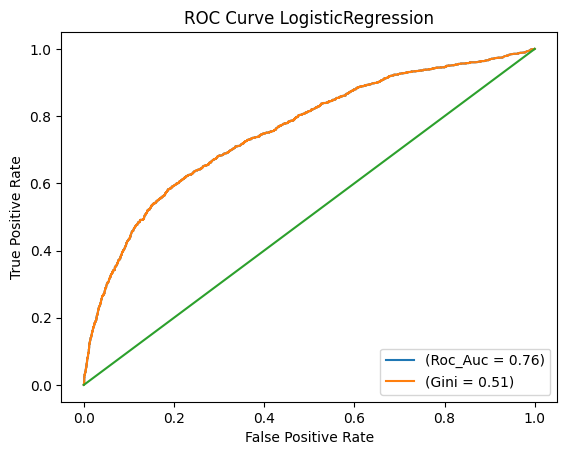

In [383]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_prob = log_reg_def.predict_proba(X_test_log)[:,1]

roc_auc = roc_auc_score(y_test_log, y_prob)
gini = (2*roc_auc) - 1

fpr, tpr, thresholds = roc_curve(y_test_log, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LogisticRegression')

plt.legend(loc='lower right')
plt.show()

In [384]:
from sklearn.metrics import precision_recall_curve

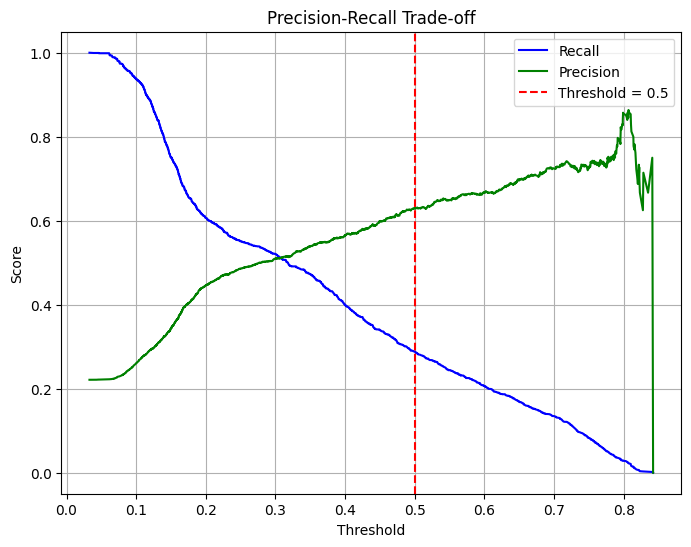

In [385]:
precision, recall, thresholds = precision_recall_curve(y_test_log, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, recall[:-1], label='Recall', color='blue')
plt.plot(thresholds, precision[:-1], label='Precision', color='green')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall Trade-off')

plt.axvline(x=0.5, color='red', linestyle='--', label='Threshold = 0.5')

plt.legend()
plt.grid(True)
plt.show()

# Optimization of Ensemble tree models

In [386]:
# pip install optuna

In [387]:
from sklearn.model_selection import cross_val_score
import optuna

- SVC

In [389]:
def best_params_for_model(trial):
    param = {
        'C': trial.suggest_loguniform('C', 0.1, 10),  # Regularization parameter
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),  # Kernel type
        'degree': trial.suggest_int('degree', 2, 5),  # Degree for polynomial kernel (only for 'poly' kernel)
        'gamma': trial.suggest_categorical('gamma', ['auto', 'scale']),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    }

    svc = SVC(**param)

    score = cross_val_score(svc, X_train_svc, y_train_svc, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=2)
best_params = study.best_params

best_svc_model = SVC(probability=True, **best_params)

[I 2024-05-19 17:55:53,799] A new study created in memory with name: no-name-38b50a1b-dcf0-4853-9eee-c9f72f7c3ec7
<ipython-input-389-bbcc04db1335>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 10),  # Regularization parameter
[I 2024-05-19 17:56:43,482] Trial 0 finished with value: 0.7259951847665501 and parameters: {'C': 3.360927378469277, 'kernel': 'rbf', 'degree': 4, 'gamma': 'auto'}. Best is trial 0 with value: 0.7259951847665501.
<ipython-input-389-bbcc04db1335>:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 10),  # Regularization parameter
[I 2024-05-19 18:00:38,294] Trial 1 finis

- Random Forest Classifier

In [390]:
def objective(trial):
    param = {
        "n_estimators": trial.suggest_int("n_estimators", 200, 500, step=100),
        "max_depth": trial.suggest_int("max_depth", 2, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 10, 200, step=10),
        "max_features": trial.suggest_int("max_features", 3, 15),
    }

    rfc_opt = RandomForestClassifier(**param)
    auc = cross_val_score(rfc_opt, X_train_tr, y_train_tr, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

best_rfc_model = RandomForestClassifier(**study.best_params)

[I 2024-05-19 18:00:43,085] A new study created in memory with name: no-name-fd0b5760-4f01-4c41-8691-be59870ff25c
[I 2024-05-19 18:01:08,548] Trial 0 finished with value: 0.7804817414343267 and parameters: {'n_estimators': 400, 'max_depth': 9, 'min_samples_split': 160, 'max_features': 4}. Best is trial 0 with value: 0.7804817414343267.
[I 2024-05-19 18:01:32,327] Trial 1 finished with value: 0.7810617764847901 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 140, 'max_features': 5}. Best is trial 1 with value: 0.7810617764847901.
[I 2024-05-19 18:02:30,254] Trial 2 finished with value: 0.7797506950049322 and parameters: {'n_estimators': 400, 'max_depth': 10, 'min_samples_split': 40, 'max_features': 8}. Best is trial 1 with value: 0.7810617764847901.


- XGBoost

In [391]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
        # Using a fraction of the data can help to prevent overfitting and improve generalization.
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1),
        'gamma': trial.suggest_int('gamma', 0,5)
        # Increasing the gamma value can help to prevent overfitting
        # Should be used only when you are using high depth
}
    xgb_clf = XGBClassifier(**param)

    auc = cross_val_score(xgb_clf, X_train_tr, y_train_tr, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc


study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=5)
best_params = study.best_params

best_xgb_model = XGBClassifier(**best_params)

[I 2024-05-19 18:02:30,270] A new study created in memory with name: no-name-afc1a9ac-3b1d-4f6a-a410-20a9076f2548
<ipython-input-391-feea526d588b>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
<ipython-input-391-feea526d588b>:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
<ipython-input-391-feea526d588b>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsamp

- LGBMClassifier

In [392]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_clf = LGBMClassifier(**param)

    auc = cross_val_score(lgb_clf, X_train_tr, y_train_tr, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=2)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMClassifier(**best_params)

[I 2024-05-19 18:02:47,652] A new study created in memory with name: no-name-21c56051-3fea-474d-87ed-66d238513d81
<ipython-input-392-4298f19a915d>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2024-05-19 18:02:52,505] Trial 0 finished with value: 0.7152558333992932 and parameters: {'n_estimators': 81, 'learning_rate': 0.9259721108438604, 'max_depth': 9, 'num_leaves': 98}. Best is trial 0 with value: 0.7152558333992932.
<ipython-input-392-4298f19a915d>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2024-05-19 18:03:07,98

Best trial:
  Value: 0.730
  Params:  {'n_estimators': 959, 'learning_rate': 0.8437396299946311, 'max_depth': 9, 'num_leaves': 48}


- CatBoostClassifier

In [393]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_clf = CatBoostClassifier(**param)

    auc = cross_val_score(cb_clf, X_train_tr, y_train_tr, cv=3, scoring='roc_auc', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostClassifier(**best_params)

[I 2024-05-19 18:03:08,011] A new study created in memory with name: no-name-f3bf9932-400e-45fd-8d4b-541e8f18733e
<ipython-input-393-3396b565a304>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
<ipython-input-393-3396b565a304>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2024-05-19 18:03:36,826] Trial 0 finished with value: 0.7698762363712661 and parameters: {'iterations': 406, 'learning_rate': 0.0722634472358961, 'depth': 8, 'l2_leaf_reg': 1.

Best trial:
  Value: 0.770
  Params:  {'iterations': 406, 'learning_rate': 0.0722634472358961, 'depth': 8, 'l2_leaf_reg': 1.418237377072718, 'loss_function': 'Logloss'}


# Gini scores of all model (default, and optimized)

In [394]:
optimized_models = []

optimized_models.extend([
    ('SVC Optuna', best_svc_model),
    ('RFC Optuna', best_rfc_model),
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model)
])

In [395]:
optimized_models_result = calculate_model_scores(optimized_models)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-375-933c15e35a7f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4977, number of negative: 17523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 22500, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [396]:
optimized_models_result

,Model,Gini_train,Gini_test
0,SVC Optuna,0.6548,0.4630
1,RFC Optuna,0.6398,0.5532
2,XGBoost Optuna,0.6230,0.5636
3,LightGBM Optuna,1.0000,0.4362
4,CatBoost Optuna,0.8722,0.5449


In [397]:
all_models_result = pd.concat([default_models_result, optimized_models_result], axis=0)
all_models_result = all_models_result.sort_values(by='Gini_test', ascending=False)

In [398]:
all_models_result

,Model,Gini_train,Gini_test
2,XGBoost Optuna,0.6230,0.5636
5,LightGBM,0.7756,0.5594
6,CatBoost,0.7829,0.5542
1,RFC Optuna,0.6398,0.5532
4,CatBoost Optuna,0.8722,0.5449
4,XGBoost,0.8972,0.5190
3,RFC,1.0000,0.5128
0,LogisticRegression,0.5346,0.5112
0,SVC Optuna,0.6548,0.4630
1,SVC,0.5962,0.4626


### Univariate analysis on RFC Optuna

In [399]:
def univariate_analysis(model, X_train, y_train, X_test, y_test):
    variables = []
    train_r2_scores = []
    test_r2_scores = []


    for i in X_train.columns:
        X_train_single_var = X_train[[i]]
        X_test_single_var = X_test[[i]]

        model.fit(X_train_single_var, y_train)
        y_pred_train_single_var = model.predict_proba(X_train_single_var)[:, 1]
        train_roc = roc_auc_score(y_train, y_pred_train_single_var)
        train_gini = train_roc*2 - 1

        y_pred_test_single_var = model.predict_proba(X_test_single_var)[:, 1]
        test_roc = roc_auc_score(y_test, y_pred_test_single_var)
        test_gini = test_roc*2 - 1

        variables.append(i)
        train_r2_scores.append(train_gini)
        test_r2_scores.append(test_gini)

    results_df = pd.DataFrame({
        'Variable': variables,
        'Train R2': train_r2_scores,
        'Test R2': test_r2_scores
    })
    results_df_sorted = results_df.sort_values(by='Train R2', ascending=False)
    pd.options.display.float_format = '{:.4f}'.format
    return results_df_sorted.reset_index(drop=True)

In [400]:
univariate_analysis_best_rfc = univariate_analysis(best_rfc_model, X_train_tr, y_train_tr, X_test_tr, y_test_tr)

<ipython-input-399-910b6d1beab0>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_single_var, y_train)
<ipython-input-399-910b6d1beab0>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_single_var, y_train)
<ipython-input-399-910b6d1beab0>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_single_var, y_train)
<ipython-input-399-910b6d1beab0>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_single_var, y_train)
<ipython-input-399-910b6d1beab0>:11: DataConversionWarning: A column

In [401]:
univariate_analysis_best_rfc

,Variable,Train R2,Test R2
0,PAY_0,0.4282,0.4062
1,PAY_AMT1,0.3347,0.2294
2,PAY_AMT2,0.3177,0.2016
3,BILL_AMT6,0.3067,0.0735
4,PAY_2,0.3042,0.2992
5,BILL_AMT4,0.3021,0.0896
6,PAY_AMT3,0.3003,0.2082
7,BILL_AMT5,0.2971,0.0983
8,BILL_AMT2,0.2956,0.0699
9,BILL_AMT3,0.2922,0.0655


In [402]:
result_univariate_cols_rfc = [
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'AGE'
]

In [403]:
best_rfc_model.fit(X_train_tr[result_univariate_cols_rfc], y_train_tr)

<ipython-input-403-70c31d97eaf0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rfc_model.fit(X_train_tr[result_univariate_cols_rfc], y_train_tr)


RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=140,
                       n_estimators=300)

In [404]:
rfc_final_train_gini, rfc_final_test_gini = train_test_and_evaluate_model('RFC Optuna with specific columns', best_rfc_model, X_train_tr[result_univariate_cols_rfc], y_train_tr, X_test_tr[result_univariate_cols_rfc], y_test_tr)

<ipython-input-375-933c15e35a7f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [405]:
print(f'Random Forest Classifier model performance--> Train gini: {rfc_final_train_gini} | Test gini: {rfc_final_test_gini}')

Random Forest Classifier model performance--> Train gini: 0.5377479314164337 | Test gini: 0.4887460231806937


### Univariate analysis on Logistic Regression

In [406]:
univariate_analysis_log_reg = univariate_analysis(log_reg_def, X_train_log, y_train_log, X_test_log, y_test_log)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [407]:
univariate_analysis_log_reg

,Variable,Train R2,Test R2
0,PAY_0_woe,0.3991,0.3800
1,PAY_2_woe,0.3033,0.2846
2,PAY_3_woe,0.2554,0.2430
3,PAY_4_woe,0.2295,0.2061
4,LIMIT_BAL_woe,0.2275,0.1979
5,PAY_5_woe,0.2029,0.2064
6,PAY_AMT1_woe,0.2014,0.2105
7,PAY_AMT2_woe,0.1929,0.2009
8,PAY_6_woe,0.1888,0.1724
9,PAY_AMT3_woe,0.1848,0.1783


In [408]:
result_univariate_cols_log = univariate_analysis_log_reg['Variable'].tolist()[:14]

In [409]:
result_univariate_cols_log

['PAY_0_woe',
 'PAY_2_woe',
 'PAY_3_woe',
 'PAY_4_woe',
 'LIMIT_BAL_woe',
 'PAY_5_woe',
 'PAY_AMT1_woe',
 'PAY_AMT2_woe',
 'PAY_6_woe',
 'PAY_AMT3_woe',
 'PAY_AMT6_woe',
 'PAY_AMT4_woe',
 'PAY_AMT5_woe',
 'LIMIT_BAL_median_by_SEX_EDUCATION_woe']

In [410]:
log_reg_def.fit(X_train_log[result_univariate_cols_log], y_train_log)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [411]:
log_reg_final_train_gini, log_reg_final_test_gini = train_test_and_evaluate_model('Logistic Regression with specific columns', log_reg_def, X_train_log[result_univariate_cols_log], y_train_log, X_test_log[result_univariate_cols_log], y_test_log)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [412]:
print(f'Logistic Regression model performance--> Train gini: {log_reg_final_train_gini} | Test gini: {log_reg_final_test_gini}')

Logistic Regression model performance--> Train gini: 0.5326848409031475 | Test gini: 0.5040163167838241


# Best gini score is on Logistic Regression model
- without stacking

# Stacking with ensemble models

In [413]:
all_models_result

,Model,Gini_train,Gini_test
2,XGBoost Optuna,0.6230,0.5636
5,LightGBM,0.7756,0.5594
6,CatBoost,0.7829,0.5542
1,RFC Optuna,0.6398,0.5532
4,CatBoost Optuna,0.8722,0.5449
4,XGBoost,0.8972,0.5190
3,RFC,1.0000,0.5128
0,LogisticRegression,0.5346,0.5112
0,SVC Optuna,0.6548,0.4630
1,SVC,0.5962,0.4626


In [414]:
from mlxtend.classifier import StackingCVClassifier

In [415]:
# Define the base classifiers
clf1 = best_lgb_model
clf2 = lgb_def

In [416]:
# # Define the meta-classifier
meta_classifier = best_rfc_model

In [417]:
# Define the stacking classifier
stacking_classifier = StackingCVClassifier(
    classifiers=[clf1, clf2],
    meta_classifier=meta_classifier,
    cv=3,
    use_features_in_secondary=True,
    verbose=1,
    random_state=42
    )

In [418]:
stacking_final_train_gini, stacking_final_test_gini = train_test_and_evaluate_model('Stacking Classifier with XGB Optuna, LGBM,  and RFC Optuna', stacking_classifier, X_train_tr[result_univariate_cols_rfc], y_train_tr, X_test_tr[result_univariate_cols_rfc], y_test_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Fitting 2 classifiers...
Fitting classifier1: lgbmclassifier (1/2)
[LightGBM] [Info] Number of positive: 3318, number of negative: 11682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 3318, number of negative: 11682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 3318, number of negative: 11682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

[LightGBM] [Info] Number of positive: 3318, number of negative: 11682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 115
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
[LightGBM] [Info] Number of positive: 3318, number of negative: 11682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 118
[LightGBM] [Info] Number of data points in the train set: 15000, number of used features: 7
[LightGBM] [Info] [binar

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 4977, number of negative: 17523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 22500, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 4977, number of negative: 17523
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 121
[LightGBM] [Info] Number of data points in the train set: 22500, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221200 -> initscore=-1.258687
[LightGBM] [Info] Start training from score -1.258687


/usr/local/lib/python3.10/dist-packages/mlxtend/classifier/stacking_cv_classification.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.meta_clf_.fit(meta_features, y)


In [419]:
print(f'Stacking Classifier model performance--> Train gini: {stacking_final_train_gini} | Test gini: {stacking_final_test_gini}')

Stacking Classifier model performance--> Train gini: 0.5364421817734175 | Test gini: 0.4868109791945878


# Final Result the best model is:

In [420]:
print(f'Logistic Regression model performance--> Train gini: {log_reg_final_train_gini} | Test gini: {log_reg_final_test_gini}')

Logistic Regression model performance--> Train gini: 0.5326848409031475 | Test gini: 0.5040163167838241
